## loading the imdb dataset

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



## Decoding reviews back to text

In [3]:
#word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()

#reverse_word_index reverse get_word_index, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
"""decoded_review decodes the review. the indices are offeset by 3 because 0,1,2 are reserved indices for padding,
staet of sequence and unknown """


'decoded_review decodes the review. the indices are offeset by 3 because 0,1,2 are reserved indices for padding,\nstaet of sequence and unknown '

## encoding the integer sequences via multi-hot encoding

In [25]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))#creates an  all zeros of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. #sets specific indices of results[i] to 1s
    return results

#vectorize test data and train data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#vectrize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

#print(x_train[0])
#print(y_train[0])

## model definition

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## compiling the model

In [16]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#setting aside the validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#traiming the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 143ms/step - loss: 0.5075 - accuracy: 0.7967 - val_loss: 0.3852 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3071 - accuracy: 0.8995 - val_loss: 0.3049 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2227 - accuracy: 0.9286 - val_loss: 0.2848 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1788 - accuracy: 0.9394 - val_loss: 0.2772 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1470 - accuracy: 0.9529 - val_loss: 0.2823 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1208 - accuracy: 0.9632 - val_loss: 0.2903 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1000 - accuracy: 0.9705 - val_loss: 0.3291 - val_accuracy: 0.8811
Epoch 8/20
3

## plotting the training and validation loss

<function matplotlib.pyplot.show(close=None, block=None)>

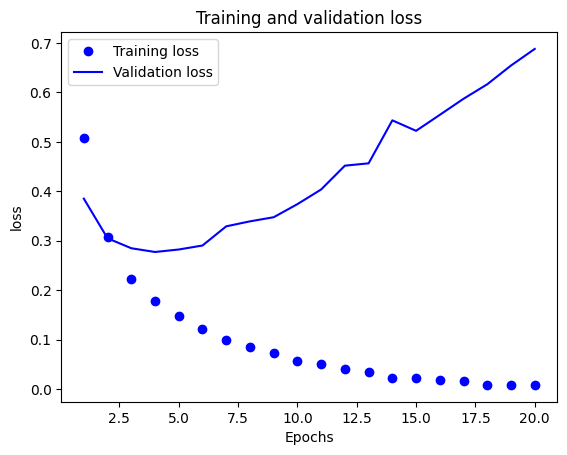

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show

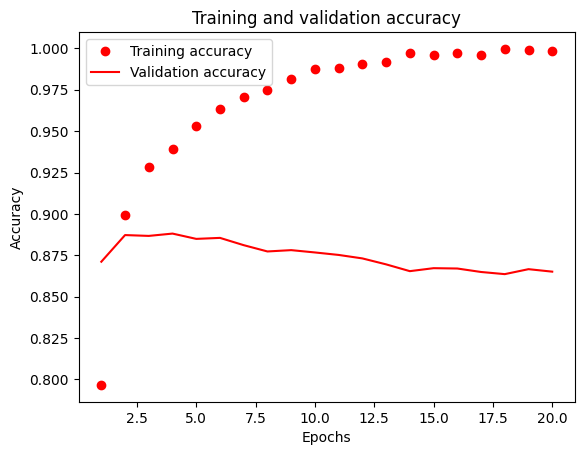

In [20]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## retraining model from scratch

In [26]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.